# Breast-Cancer-Dataset-Analysis


## Descripción:
En el presente notebook, voy a realizar un analisis del Breast cancer dataset, para luego aplicar modelos de machine learning, K Folds, Grid Search, entre otros métodos, y así comparando sus resultados y cual se adecua mejor.
El Notebook tendrá la siguiente estructura en forma de **pasos**


## Pasos:

1. [Visualizar datos, ver sumarizaciones](#actividad-1)
2. [Dividir entre entrenamiento y test](#actividad-2)
3. [Entrenar un modelo simple. (KNN)](#actividad-3)
4. [Ver métricas de rendimiento](#actividad-4)
5. [Normalizar características ¿mejora haciendo eso?](#actividad-5)
6. [Optimizar hiperparametros ¿cuánto mejora?](#actividad-6)
7. [Aplicar modelos más complejos ¿mejora con modelos más complejos?](#actividad-7)
8. [Modificar optimización de híper-parámetros y usar kfolds](#actividad-8)
9. [Entramiento del modelo final](#actividad-9)


Lo primero que hago es importar todas las librerias necesarias que fui usando

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  
from sklearn import neighbors
import seaborn as sns
from sklearn.metrics import accuracy_score
#para que matplotlib tengo los gráficos de seaborn
sns.set
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Para cargar los datos de las variables dependientes e independientes realizamos lo siguiente
# que es un método de sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)

Si bien, puedo obtener los datos del dataset con sklearn, decidí usar el dataset de cancer, que se encuentra en formato ".csv", ya que de esta forma puedo usar la librería de pandas, y todos las funcionas de las mismas con las que me siento mas familiarizado.

In [2]:
# Uso pandas para trabajar mejor
cancer = pd.read_csv("cancer.csv")


<a id="actividad-1"></a>

## 1) Visualizar datos, ver sumarizaciones

---

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


De la siguiente manera obtengo todos los nombres de las columas y sus tipos

In [4]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Usamos la funcion cancer describe para obtener una sumarizacion rápida del dataset



In [5]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## visualizar la correlacion entre los datos con un mapa de calor, para ver la misma entre los distintos features del dataset, y de esta manera podemos ver las relaciones entre los mismos


[]

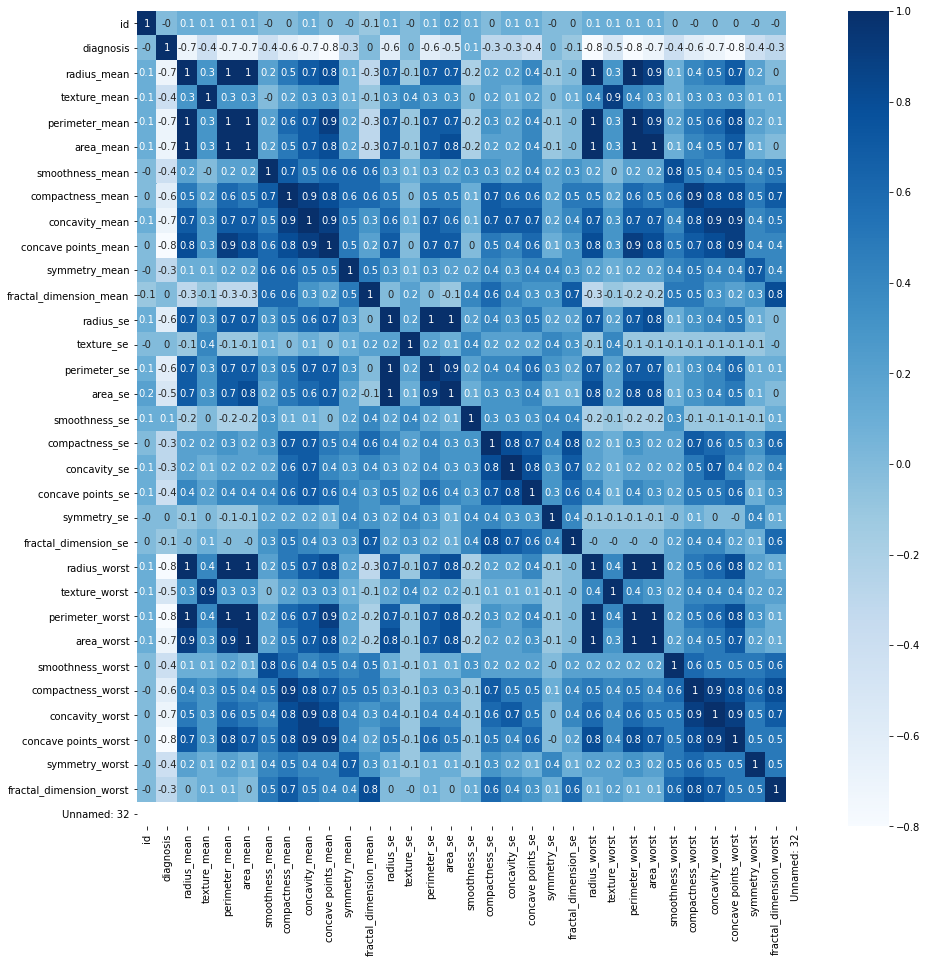

In [6]:
# Uso la variable cancer1 para hacer el heatmap de abajo, necesito reemplazar los diagnosticos con números
cancer1 =cancer
cancer1["diagnosis"]=cancer["diagnosis"].map({"M":0,"B":1}).astype(float)

plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(round(cancer1.corr(),1), cmap='Blues', annot=True)
plt.plot()

#otra manera de hacerlo sin el mapa de calor es de la siguiente manera:
#cancer.corr()

Con los Box Plot, podemos ver como los distintos features estan distribuidos, teniendo en cuenta el diagnostico, osea Maligno o Benigno, en este caso, solo hice una visualizacion de el area media, y de el radio medio, utilizando pandas primero y luego seaborn.
Estos gráficos nos sirven para saber si estos features son importantes para el modelo futuro.

<AxesSubplot:title={'center':'area_mean'}, xlabel='diagnosis'>

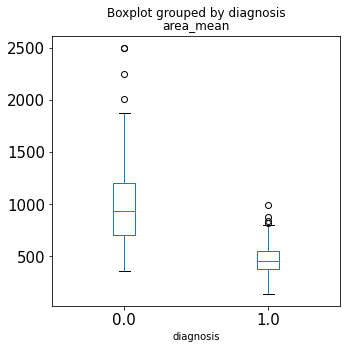

In [7]:
cancer.boxplot(by ='diagnosis', column =[
       'area_mean' ], grid = False,fontsize=15,figsize=(5,5))

array([<AxesSubplot:title={'center':'concavity_worst'}, xlabel='diagnosis'>,
       <AxesSubplot:title={'center':'smoothness_worst'}, xlabel='diagnosis'>],
      dtype=object)

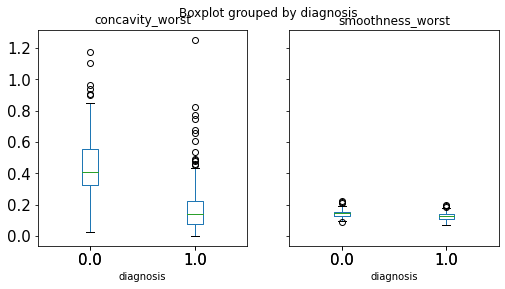

In [8]:
cancer.boxplot(by ='diagnosis', column =[
       'concavity_worst',"smoothness_worst" ], grid = False,fontsize=15,figsize=(8,4))

Para ver la relacion entre los distintos features podemos visualizarlos con un scatter plot, para ver como se agrupan, esto nos puede ayudar para hacer inferencias

In [9]:
import altair as alt

alt.Chart(cancer,width=150,height=250,).mark_boxplot().encode(
    x='diagnosis:O',
    y='perimeter_mean:Q'
).properties(title='Distribución de cancer Maligno(0) y Benigno(1) por perímetro ')

alt.Chart(...)

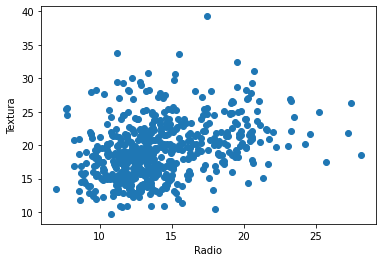

In [10]:
# visualizamos como se relacionan el radio y la textura
plt.scatter(X[:,0], X[:,1]) 
plt.xlabel('Radio')  # xlabel le da un nombre al eje de las x
plt.ylabel('Textura')  # ylabel le da un nombre al eje de las y
plt.show()

En el gráfico de arriba podemos ver que no se sabe muy bien la relacion entre los puntos, pero en cambio si le agregamos la salida Y, osea maligno o benigno, podemos ver una division más clara entre las caracteristicas de estos atributos, incluso podemos identificar 2 posibles clusters con este gráfico

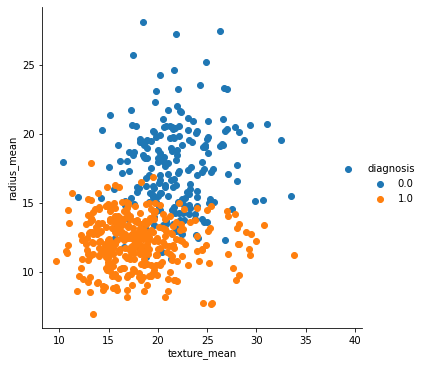

In [11]:
sns.lmplot(y='radius_mean', x='texture_mean', hue='diagnosis', 
           data=cancer, 
           fit_reg=False, scatter_kws={'alpha':1})

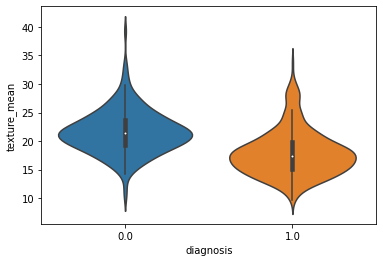

In [12]:
ax = sns.violinplot(x="diagnosis", y="texture_mean", data=cancer)

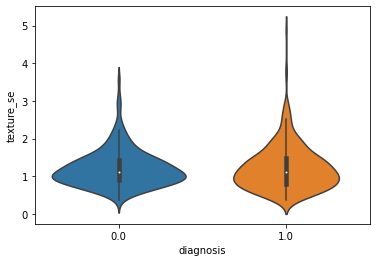

In [13]:
ax = sns.violinplot(x="diagnosis", y="texture_se", data=cancer)

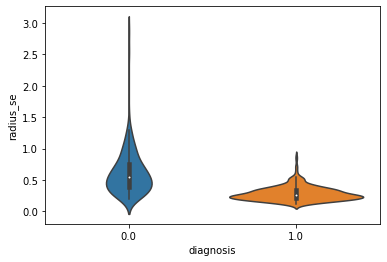

In [14]:
ax = sns.violinplot(x="diagnosis", y="radius_se", data=cancer)

In [15]:
cancer.diagnosis

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: diagnosis, Length: 569, dtype: float64

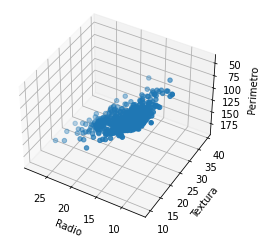

In [16]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
my_cmap = plt.get_cmap('hsv')

ax.scatter(X[:,0], X[:,1],X[:,2],) 
ax.set_xlabel('Radio')
ax.set_ylabel('Textura')
ax.set_zlabel('Perimetro')
#cambia el angulo de visualizacion
ax.view_init(-140, 60)

plt.show()

Ahora vamos a contar la cantidad de cansos Benigno y Malignos para seguir analizando

In [17]:

resultados = cancer["diagnosis"].value_counts()
resultados

1.0    357
0.0    212
Name: diagnosis, dtype: int64

En el siguiente gráfico de barras podemos observar que tenemos mas casos Benignos que malignos

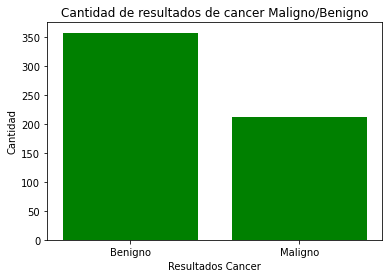

In [18]:
plt.bar(["Benigno","Maligno"], resultados, color='green')
plt.xlabel("Resultados Cancer")
plt.ylabel("Cantidad")
plt.title("Cantidad de resultados de cancer Maligno/Benigno")
plt.show()

<a id="actividad-2"></a>

## 2) Dividir entre entrenamiento y test

---

In [19]:
from sklearn.model_selection import train_test_split
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)
# vemos los resultados de la mezcla...
print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")



X_train shape (398, 30)
X_test shape (171, 30)
y_train shape (398,)
y_test shape (171,)


<a id="actividad-3"></a>

## 3) Entrenar un modelo simple. (KNN)

---

Elegí KNN como modelo para entrenar ya que su funcionamiento es bastante simples, ya que se basa en la cantidad de vecinos (o muestras) mas cercanas del dataset

In [20]:
# Elijo una cantidad de vecinos impar para no caer en un dilema de 50%, o tener 2 vecinos iguales
clf_sk = neighbors.KNeighborsClassifier(n_neighbors=1, p=1)
clf_sk.fit(X_train,y_train)
y_hat = clf_sk.predict(X_test)


<a id="actividad-4"></a>

## 4) ver métricas de rendimiento

---

Para las métricas voy a usar el accuracy primero, seguido de la matrix de confusión, para saber el porcentaje de y la cantidad de falsos positivos y negativos, y verdaderos positvos y negativos

In [21]:
accuracy =accuracy_score(y_true=y_test, y_pred=y_hat)
print(f'Tasa de aciertos: {accuracy}')
print(f'Porcentaje: %{round(accuracy*100,2)}')

#
print("Matriz de confusion sencilla:")
confusion_matrix(y_test, y_hat)




Tasa de aciertos: 0.9122807017543859
Porcentaje: %91.23
Matriz de confusion sencilla:


array([[57, 13],
       [ 2, 99]], dtype=int64)

Para visualizar mejor la matris de confusion, hacemos un mapa de calor


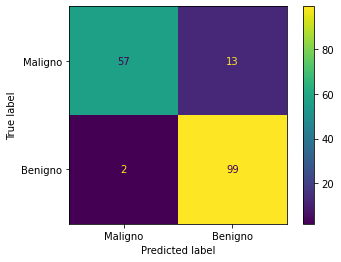

In [22]:
plot_confusion_matrix(clf_sk, X_test, y_test,display_labels=["Maligno","Benigno"]) 

Tambien es posible visualizar la matriz de confusión en proporciones con respecto al total

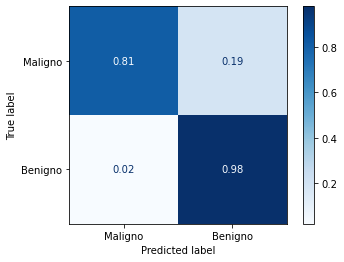

In [23]:
plot_confusion_matrix(clf_sk, X_test, y_test,
                      display_labels=["Maligno","Benigno"],
                      cmap=plt.cm.Blues,
                      normalize='true')
plt.show()

### Reporte de métricas

El  <strong>true positive rate, sensitivity o recall </strong>, representa el porcentaje de positivos correctamente inferidos por cada positivo real"

La <strong>precisión</strong> será "cuántos se clasificaron correctamente entre esa clase"

La <strong>puntuación f1 /f1-score</strong> es la media armónica entre la precisión y el recall.

El <strong>soporte/support</strong> es el número de ocurrencias de la clase dada en su conjunto de datos

In [24]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_hat, target_names=["Maligno","Benigno"]))

              precision    recall  f1-score   support

     Maligno       0.97      0.81      0.88        70
     Benigno       0.88      0.98      0.93       101

    accuracy                           0.91       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.91      0.91       171



<a id="actividad-5"></a>

## 5) Normalizar características ¿mejora haciendo eso?

---

Lo que voy a hacer ahora es normalizar los datos para ver si hay algún cambio en la precision del modelo

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
#para el train set, los fit y lo transfonsmormamos
# para el test solo transformamos
X_train = sc_X.fit_transform(X_train)
# no le hacemos el fit al test porque ya esta fitted al train set
# ya esta ajustado, si ajustamos X_train primero, X_test despues no hay que falta
X_test = sc_X.transform(X_test)

clf_sk = neighbors.KNeighborsClassifier(n_neighbors=1, p=1)
clf_sk.fit(X_train,y_train)

y_hat = clf_sk.predict(X_test)

In [26]:
accuracy_escalado=accuracy_score(y_true=y_test, y_pred=y_hat)
print(f'Tasa de aciertos: {accuracy_escalado}')

Tasa de aciertos: 0.9415204678362573


In [27]:
print(f"Accuracy sin escalar los datos {accuracy}")
print(f"Accuracy datos escalados {accuracy_score(y_true=y_test, y_pred=y_hat)}")
print(f"Diferencia total %{round(accuracy_escalado-accuracy,2)*100}")

Accuracy sin escalar los datos 0.9122807017543859
Accuracy datos escalados 0.9415204678362573
Diferencia total %3.0


#### Escalando los datos solo se consigue una mejor del 3% aproximadamente, por lo tanto escalamos los datos, pero el escalado va a depender del modelo que elegimos, ya que no todos los modelos requieren escalar los datos, aparte de que hay varias maneras de hacerlo, en mi caso use la funcion StandarScaler(), pero hay otras como MinMaxScaler() de sklearn

In [28]:
#Volvemos a los valores de entramiento y prueba originales
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)
#clf_sk = neighbors.KNeighborsClassifier(n_neighbors=3, p=1)
#clf_sk.fit(X_train,y_train)
#y_hat = clf_sk.predict(X_test)



<a id="actividad-6"></a>


## 6) Optimizar hiperparametros ¿cuánto mejora?

---

Voy a usar el modelo escalado para encontrar los mejores hiperparámetros
Para esto voy a usar la búsqueda en grilla de sklearn,
cabe aclarar que tambien este método en sklearn incluye K-folds como método de validación cruzada en la GridSearch, donde K-folds, utilizamos k-folds, para no depender de la suerte o mala suerte en el split de test-train de los datos, de esta manera, nos aseguramos que el error de test sea lo más parecido a la realidad

### Primero creamos un diccionario con todos los parámetros que le vamos a pasar al método para la búsqueda en grilla.
Estos parámetros los obtuve de la documentación de Sklearn.
Donde le pasamos:
- La cantidad de vecinos que queremos probar
- La medida de distancia a utilizar
- Los pesos de los vecinos
- El tipo de algortimos de KNN


In [29]:
from sklearn.model_selection import GridSearchCV 
grid_params = {'n_neighbors': range(1,50), 'weights': ['uniform', 'distance'], 'metric':['euclidean' , 'manhattan'],"algorithm":["auto", 'ball_tree', 'kd_tree', 'brute']}


Para el GridSearch le pasamos lo siguiente:
- El modelo que vamos a usar
- Los parámetros del mismo para que pruebe
- cv: la cantidad de Folds
- n_jobs: cantidad de trabajo en paralello, osea el uso del procesador, -1, significa que use todos
- verbose: muestra distintos mensajes

In [30]:
gs = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv = 5, n_jobs = -1 )
gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 784 candidates, totalling 3920 fits


Podemos ver las distintas keys del objeto GridSearch hacemos lo siguiente

In [31]:
sorted(gs.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_algorithm',
 'param_metric',
 'param_n_neighbors',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

La cantidad de combinaciones que se hicieron son la siguientes

In [32]:
len(gs.cv_results_["params"])

784

Con esto podemos observar que es un método computacionalmente caro, por lo que para grandes datasets, tomaría horas en ejecutarse

In [33]:
print(f"Mejor accuracy obtenida de la búsqueda en grilla {gs_results.best_score_}")
print(f"Aproximadamente: %{round(gs_results.best_score_,2)*100}")

Mejor accuracy obtenida de la búsqueda en grilla 0.9774050632911393
Aproximadamente: %98.0


## El método de gridSearch nos arrojó los siguientes hiper-parámetros como los más optimos

In [34]:
#gs_results.best_estimator_
print("Mejores Parámetros: \n")
for key,value in gs_results.best_params_.items():
    print(f"{key}: {value}")


Mejores Parámetros: 

algorithm: auto
metric: manhattan
n_neighbors: 4
weights: distance


In [35]:
# Es posible ver todos las combinaciones realizadas con el siguiente comando, no lo ejecuto, porque no aporta mucho al análisis
#gs_results.cv_results_ # ver todas las combinaciones

De entre todas las combinaciones realizadas por el GridSeach, la combinación de indice 105, fue la mejor

In [36]:
gs_results.best_index_ 

105

In [37]:
print(f"Mejor accuracy obtenida de la búsqueda en grilla {gs_results.best_score_}")
print(f"Accuracy obtenida sin la búsqueda en grilla: {accuracy_escalado}")
print(f"Mejora obtenida total: %{round(gs_results.best_score_-accuracy_escalado,2)*100}")

Mejor accuracy obtenida de la búsqueda en grilla 0.9774050632911393
Accuracy obtenida sin la búsqueda en grilla: 0.9415204678362573
Mejora obtenida total: %4.0


<a id="actividad-7"></a>

## 7) Aplicar modelos más complejos ¿mejora con modelos más complejos?

---

### A continuación voy a otros modelos al dataset para experimentar con ellos


---
## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)
classifier = RandomForestClassifier(n_estimators = 10,criterion = "entropy", random_state=0)

classifier.fit(X_train,y_train)
# Predicting the Test set results
y_hat = classifier.predict(X_test)
print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))

Tasa de aciertos:  0.935672514619883


In [39]:
#Escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 10,criterion = "entropy", random_state=0)

classifier.fit(X_train,y_train)
# Predicting the Test set results
y_hat = classifier.predict(X_test)
print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))


Tasa de aciertos:  0.935672514619883


## Árbol de decisión


In [40]:


#Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_hat = classifier.predict(X_test)
print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))


Tasa de aciertos:  0.9122807017543859


El Árbol de decisión arroja un menor resultado comparado con el Random Forest, esto tiene sentido, ya que a random forest, se lo considera un modelo más avanzado que el árbol de decision <br>

Otra particularidad de estos dos modelos es que no es necesario realizar Feature Scaling, como podemos apreciar en el random forest, que el resultado del accuracy dio identico, ya sea escanlando o no los datos

---

## Clasificador de Naive Bayes
Este clasificar se basa en la aplicación del teorema de Bayes con fuertes supuestos de independencia (ingenua/naive) entre las características . Este clasificador es uno de los que genera mejores resultados, pero requiere saber ciertos supuestos o parámetros de antemano para obtener los mejores resultados. <br>
A continuacion dejo una imagen con el teorema de bayes, y una aproximación de su funcionamiento <br>


![NB](https://miro.medium.com/max/6190/1*39U1Ln3tSdFqsfQy6ndxOA.png)
<br>
[Fuente](https://towardsdatascience.com/introduction-to-na%C3%AFve-bayes-classifier-fa59e3e24aaf)


In [41]:
#Escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_hat = classifier.predict(X_test)
print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))


Tasa de aciertos:  0.935672514619883


Este clasificador también es inmune al feature scaling. <br>
En general podemos observar que los algortimos que se basan en distancias o similitud, como KNN o SVM, requieren de feature scaling, mientras que otros como el random forest o el clasificador de Bayes no. <br>
 
 ---

<a id="actividad-8"></a>


## 8) modificar optimización de híper-parámetros y usar kfolds <br>

---
A continuación voy a usar kfolds <br> 
K Fold  Divide el conjunto de datos en k pliegues consecutivos.

Cada pliegue se utiliza una vez como validación mientras que los k - 1 pliegues restantes forman el conjunto de entrenamiento.

![Imagen](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

### A continuación voy a realizar Kfold de dos maneras distintas pero que llevan al mismo resultado, primero usaré la librería de SKlearn KFold, y luego de la forma vista en clases

In [42]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

kfold = model_selection.KFold(n_splits=10)
model_kfold = neighbors.KNeighborsClassifier(n_neighbors=gs_results.best_params_["n_neighbors"],
 algorithm=gs_results.best_params_["algorithm"], metric=gs_results.best_params_["metric"],weights=gs_results.best_params_["weights"])



results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)



print("Accuracy promedio de los 10 folds: %.6f%%" % (results_kfold.mean()*100.0)) 

Accuracy promedio de los 10 folds: 97.993590%


In [43]:
print(f"Resultados de accuracy de cada fold \n{results_kfold}")

Resultados de accuracy de cada fold 
[0.975      1.         0.975      0.95       0.975      0.95
 1.         1.         1.         0.97435897]


In [44]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# n_splits es el numero de divisiones
kf = KFold(n_splits=10)

# El siguiente for nos abstrae de tener que manejar explicitamente los subindices de los folds, 
# al dividir el conjunto de entrenamiento iterativamente. En cada una de sus iteraciones
# obtenemos los subindices de todos los folds de entrenamiento y del fold de validacion de una
# division en particular, de modo tal que todos los k folds sean al menos una vez usados para 
# entrenar el modelo
accuracy = 0
scores=[]
for train_index, validation_index in kf.split(X_train):
    X_train_kf, X_validation_kf = X_train[train_index], X_train[validation_index]
    y_train_kf, y_validation_kf = y_train[train_index], y_train[validation_index]
    


    model = neighbors.KNeighborsClassifier(n_neighbors=gs_results.best_params_["n_neighbors"],
             algorithm=gs_results.best_params_["algorithm"], metric=gs_results.best_params_["metric"],                                      weights=gs_results.best_params_                        ["weights"])
    model.fit(X_train_kf ,y_train_kf)
    testPred = model.predict(X_validation_kf)
    accuracy = accuracy + accuracy_score(y_validation_kf, testPred)
    # desde aqui estamos trabajando con una division train-validation en particular
    # es decir, por ejemplo, que train_index nos da todos los indices que componen a
    # los folds que se usaran para entrenar el modelo en esta division. Usamos estos
    # indices para obtener los X_train_kf y los y_train_kf. Lo mismo sucede con los
    # indices usados para el fold de validación en esta division. Si se desea ver
    # como cambian los indices en cada iteracion, hacer un print(validation_index)
    scores.append(accuracy_score(y_validation_kf, testPred))

print(f"Accuracy promedio de los 10 folds: {accuracy/10}" )      


Accuracy promedio de los 10 folds: 0.9799358974358974


In [45]:
print(f"Resultados de accuracy de cada fold \n{scores}")

Resultados de accuracy de cada fold 
[0.975, 1.0, 0.975, 0.95, 0.975, 0.95, 1.0, 1.0, 1.0, 0.9743589743589743]


Como podemos observar, los resultados de los kfold de los dos métodos son iguales, ademas de consistentes en los resultados, ya que no hay mucha variabolidad en el accuracy, lo que es una indicación de que nuestras datos de entramientos y pruebas elegimos correctamente

<a id="actividad-9"></a>

## 9) Entramiento del modelo final

---
Ahora vamos a entrar el modelo final, con los hiper-parámetros ya seleccionados y el k-fold ya realizado, para despues hacer la curva ROC.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)
# vemos los resultados de la mezcla...
print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

clf_sk = neighbors.KNeighborsClassifier(n_neighbors=gs_results.best_params_["n_neighbors"],
             algorithm=gs_results.best_params_["algorithm"], metric=gs_results.best_params_["metric"],                                      weights=gs_results.best_params_["weights"])
clf_sk.fit(X_train,y_train)
y_hat = clf_sk.predict(X_test)

X_train shape (398, 30)
X_test shape (171, 30)
y_train shape (398,)
y_test shape (171,)


### Curva ROC
Estas curvas son utilizer para evaluar con qué margen de confianza nuestro clasificador infiere la clase de cada una de las observaciones, para que de esta manera poder compararlo mejor frente a otros clasificadores en cuanto a su capacidad de generalizar.
<br>
En este gráfico, tambien podemos ver como nuestro clasificador clasifica nuestras salidas, en nuestro caso, si se trata de cancer Maligno o Benigno, indicandonos si se trata de True Positive o de errores de tipo False Positive.

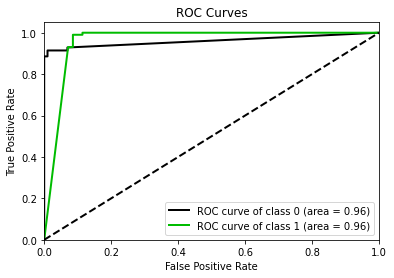

In [47]:
import scikitplot as skplt

y_hat_probas = clf_sk.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_hat_probas, plot_micro=False, plot_macro=False)
plt.show()